<a href="https://colab.research.google.com/github/ShunMatsuoka/regression_search/blob/main/regression_search.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##回帰分析モデル調査
↓sklearnで用意している回帰モデルは以下のものがあるようです
https://qiita.com/futakuchi0117/items/72ce4afae9adcccd6e18

In [ ]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

In [ ]:
from sklearn.datasets import load_boston 
dataset = load_boston()

In [ ]:
x = dataset.data #説明変数 目的変数と裏付けるためのデータ
t = dataset.target #目的変数　単体では単なるデータとなるため説明変数を使う

In [ ]:
f_name = dataset.feature_names

In [ ]:
x.shape

(506, 13)

In [ ]:
t.shape

(506,)

In [ ]:
# データセットを分割する関数の読み込み 
from sklearn.model_selection import train_test_split 
# 訓練用データセットとテスト用データセットへの分割 test_size=0.3で3割テストデータに割く
x_train, x_test, t_train, t_test = train_test_split(x, t, test_size=0.3, random_state=0)

In [ ]:
import pandas as pd

#データフレーム型に変換
train_df = pd.DataFrame(x_train, columns=f_name)
train_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1.62864,0.0,21.89,0.0,0.624,5.019,100.0,1.4394,4.0,437.0,21.2,396.90,34.41
1,0.11460,20.0,6.96,0.0,0.464,6.538,58.7,3.9175,3.0,223.0,18.6,394.96,7.73
2,0.55778,0.0,21.89,0.0,0.624,6.335,98.2,2.1107,4.0,437.0,21.2,394.67,16.96
3,0.06466,70.0,2.24,0.0,0.400,6.345,20.1,7.8278,5.0,358.0,14.8,368.24,4.97
4,0.09299,0.0,25.65,0.0,0.581,5.961,92.9,2.0869,2.0,188.0,19.1,378.09,17.93
...,...,...,...,...,...,...,...,...,...,...,...,...,...
349,0.28392,0.0,7.38,0.0,0.493,5.708,74.3,4.7211,5.0,287.0,19.6,391.13,11.74
350,0.08664,45.0,3.44,0.0,0.437,7.178,26.3,6.4798,5.0,398.0,15.2,390.49,2.87
351,0.15098,0.0,10.01,0.0,0.547,6.021,82.6,2.7474,6.0,432.0,17.8,394.51,10.30
352,0.22927,0.0,6.91,0.0,0.448,6.030,85.5,5.6894,3.0,233.0,17.9,392.74,18.80


In [ ]:
train_df = pd.concat([train_df, pd.DataFrame(t_train)], axis=1).rename(columns={0: "MEDV"})
train_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,1.62864,0.0,21.89,0.0,0.624,5.019,100.0,1.4394,4.0,437.0,21.2,396.90,34.41,14.4
1,0.11460,20.0,6.96,0.0,0.464,6.538,58.7,3.9175,3.0,223.0,18.6,394.96,7.73,24.4
2,0.55778,0.0,21.89,0.0,0.624,6.335,98.2,2.1107,4.0,437.0,21.2,394.67,16.96,18.1
3,0.06466,70.0,2.24,0.0,0.400,6.345,20.1,7.8278,5.0,358.0,14.8,368.24,4.97,22.5
4,0.09299,0.0,25.65,0.0,0.581,5.961,92.9,2.0869,2.0,188.0,19.1,378.09,17.93,20.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349,0.28392,0.0,7.38,0.0,0.493,5.708,74.3,4.7211,5.0,287.0,19.6,391.13,11.74,18.5
350,0.08664,45.0,3.44,0.0,0.437,7.178,26.3,6.4798,5.0,398.0,15.2,390.49,2.87,36.4
351,0.15098,0.0,10.01,0.0,0.547,6.021,82.6,2.7474,6.0,432.0,17.8,394.51,10.30,19.2
352,0.22927,0.0,6.91,0.0,0.448,6.030,85.5,5.6894,3.0,233.0,17.9,392.74,18.80,16.6


In [ ]:
train_df.describe().T # .Tは転置

,count,mean,std,min,25%,50%,75%,max
CRIM,354.0,3.358284,8.353223,0.00632,0.073425,0.26266,3.10370,88.9762
ZN,354.0,11.809322,23.653056,0.00000,0.000000,0.00000,20.00000,100.0000
INDUS,354.0,11.078757,6.993821,0.46000,4.950000,8.56000,18.10000,27.7400
CHAS,354.0,0.064972,0.246825,0.00000,0.000000,0.00000,0.00000,1.0000
NOX,354.0,0.556098,0.115601,0.38500,0.450000,0.53800,0.62925,0.8710
RM,354.0,6.308427,0.702009,3.56100,5.895250,6.21550,6.64725,8.7800
AGE,354.0,68.994068,28.038429,2.90000,45.175000,79.45000,93.75000,100.0000
DIS,354.0,3.762459,2.067661,1.17420,2.107650,3.21570,5.07930,12.1265
RAD,354.0,9.353107,8.671999,1.00000,4.000000,5.00000,24.00000,24.0000
TAX,354.0,401.782486,170.592404,187.00000,276.000000,311.00000,666.00000,711.0000


##モデルの選択
###ここでモデルの変更しちゃってください
###変更する点は import とインスタンス生成とfitの3つです
###coefとかでエラー起こした際はすっ飛ばしてセルを実行してみてください
###↑のエラーが発生した際はグラフ描画できません

In [ ]:
from sklearn.linear_model import LinearRegression# モデルの定義 
reg_model = LinearRegression() #インスタンス生成
reg_model.fit(x_train, t_train) #fitする目的変数と説明変数の入力

In [ ]:
reg_model.coef_ #重みは説明変数ごとに出す

array([-1.21310401e-01,  4.44664254e-02,  1.13416945e-02,  2.51124642e+00,
       -1.62312529e+01,  3.85906801e+00, -9.98516565e-03, -1.50026956e+00,
        2.42143466e-01, -1.10716124e-02, -1.01775264e+00,  6.81446545e-03,
       -4.86738066e-01])

In [ ]:
reg_model.intercept_ #バイアスb

37.93710774183309

In [ ]:
#属性ごとに重みを出してみる

#属性の追加
stem_df = pd.DataFrame({"feature": f_name})
#重みの追加
stem_df["coef"] = reg_model.coef_
stem_df

,feature,coef
0,CRIM,-0.121310
1,ZN,0.044466
2,INDUS,0.011342
3,CHAS,2.511246
4,NOX,-16.231253
5,RM,3.859068
6,AGE,-0.009985
7,DIS,-1.500270
8,RAD,0.242143
9,TAX,-0.011072


In [ ]:
reg_model.score(x_train, t_train)

0.7645451026942549

In [ ]:
reg_model.predict(x_test)

array([24.9357079 , 23.75163164, 29.32638296, 11.97534566, 21.37272478,
       19.19148525, 20.5717479 , 21.21154015, 19.04572003, 20.35463238,
        5.44119126, 16.93688709, 17.15482272,  5.3928209 , 40.20270696,
       32.31327348, 22.46213268, 36.50124666, 31.03737014, 23.17124551,
       24.74815321, 24.49939403, 20.6595791 , 30.4547583 , 22.32487164,
       10.18932894, 17.44286422, 18.26103077, 35.63299326, 20.81960303,
       18.27218007, 17.72047628, 19.33772473, 23.62254823, 28.97766856,
       19.45036239, 11.13170639, 24.81843595, 18.05294835, 15.59712226,
       26.21043403, 20.81140432, 22.17349382, 15.48367365, 22.62261604,
       24.88561528, 19.74754478, 23.0465628 ,  9.84579105, 24.36378793,
       21.47849008, 17.62118176, 24.39160873, 29.95102691, 13.57219422,
       21.53645439, 20.53306273, 15.03433182, 14.3232289 , 22.11929299,
       17.07321915, 21.54141094, 32.96766968, 31.371599  , 17.7860591 ,
       32.75069556, 18.74795323, 19.21428022, 19.41970047, 23.08

In [ ]:
reg_model.score(x_test, t_test)

0.6733825506400171

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
scaler.fit(x_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

##データの標準化作業
###標準化後の精度検証です

In [ ]:
#平均
scaler.mean_

array([3.35828432e+00, 1.18093220e+01, 1.10787571e+01, 6.49717514e-02,
       5.56098305e-01, 6.30842655e+00, 6.89940678e+01, 3.76245876e+00,
       9.35310734e+00, 4.01782486e+02, 1.84734463e+01, 3.60601186e+02,
       1.24406497e+01])

In [ ]:
#分散
scaler.var_

array([6.95792305e+01, 5.57886665e+02, 4.87753572e+01, 6.07504229e-02,
       1.33257561e-02, 4.91423928e-01, 7.83932705e+02, 4.26314655e+00,
       7.49911344e+01, 2.90195600e+04, 4.93579208e+00, 7.31040807e+03,
       4.99634123e+01])

In [ ]:
#データセットに対して標準化を施す
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [ ]:
#インスタンス生成と訓練の実行
reg_model = LinearRegression()

reg_model.fit(x_train_scaled, t_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#可視化
stem_df = pd.DataFrame({"features": f_name})
stem_df["coef"] = reg_model.coef_

stem_df

,features,coef
0,CRIM,-1.011901
1,ZN,1.050280
2,INDUS,0.079210
3,CHAS,0.618962
4,NOX,-1.873691
5,RM,2.705270
6,AGE,-0.279573
7,DIS,-3.097665
8,RAD,2.096900
9,TAX,-1.886063


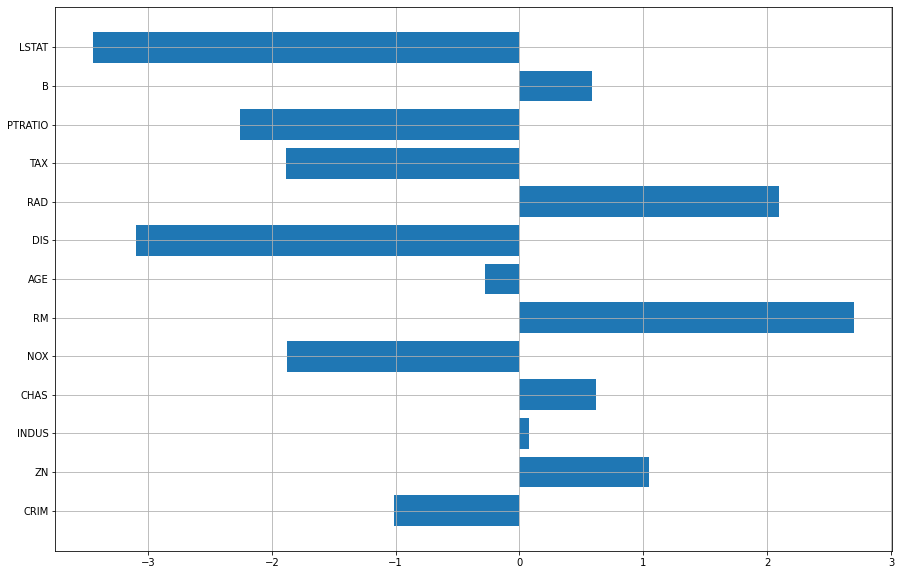

In [ ]:
plt.subplots(figsize=(15,10))
x = stem_df.features
y = stem_df.coef

x_position = range(len(x))
plt.barh(x_position, y, tick_label=x)
plt.grid()
plt.show()

In [ ]:
#精度検証(訓練データ)
reg_model.score(x_train_scaled, t_train)

0.7645451026942549

In [ ]:
#精度検証(テストデータ)
reg_model.score(x_test_scaled, t_test)

0.6733825506400195